In [1]:
import pandas as pd
import numpy as np
import dill as pickle
from datetime import datetime, timedelta

from cosinorage.datahandlers import NHANESDataHandler, plot_orig_enmo, plot_enmo, plot_orig_enmo_freq
from cosinorage.features import WearableFeatures, plot_sleep_predictions, plot_cosinor

%load_ext autoreload
%autoreload 2

In [2]:
reload_nhanes = True

In [3]:
if reload_nhanes:
    nhanes_handler = NHANESDataHandler(nhanes_file_dir='../data/nhanes/', seqn=62164, verbose=True)
    with open("pickle/nhanes_handler.pkl", "wb") as file:
        pickle.dump(nhanes_handler, file)
else:
    with open("pickle/nhanes_handler.pkl", "rb") as file:
        nhanes_handler = pickle.load(file)

Found 1 versions of NHANES data


Reading day-level files: 100%|██████████| 1/1 [00:00<00:00, 25.98it/s]


Read 9 day-level records for person 62164


Processing chunks for version G: 782it [01:05, 11.95it/s], ?it/s]
Reading minute-level files: 100%|██████████| 1/1 [01:05<00:00, 65.46s/it]


Read 11529 minute-level records for person 62164


Reading header files: 100%|██████████| 1/1 [00:00<00:00, 46.64it/s]
/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/datahandlers/utils/nhanes.py:231: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  _data = _data.resample('1min').interpolate(method='linear').bfill()


Merged header and minute-level data for person 62164
Renamed columns and set timestamp index for person 62164
Calculated ENMO for person 62164
Loaded 10080 minute-level ENMO records from ../data/nhanes/
Filtered out 0 minute-level ENMO records due to incomplete daily coverage
Filtered out 0 minute-level ENMO records due to filtering for longest consecutive sequence of days
Resampled 10080 to 10080 timestamps
__load_data executed in 65.80 seconds


In [4]:
nhanes_handler.get_meta_data()

{'datasource': 'nhanes',
 'raw_n_datapoints': 10080,
 'raw_start_datetime': Timestamp('1900-01-02 00:00:00'),
 'raw_end_datetime': Timestamp('1900-01-08 23:59:00'),
 'raw_data_frequency': 'minute-level',
 'raw_data_type': 'accelerometer',
 'raw_data_unit': 'm/s^2',
 'n_days': 7}

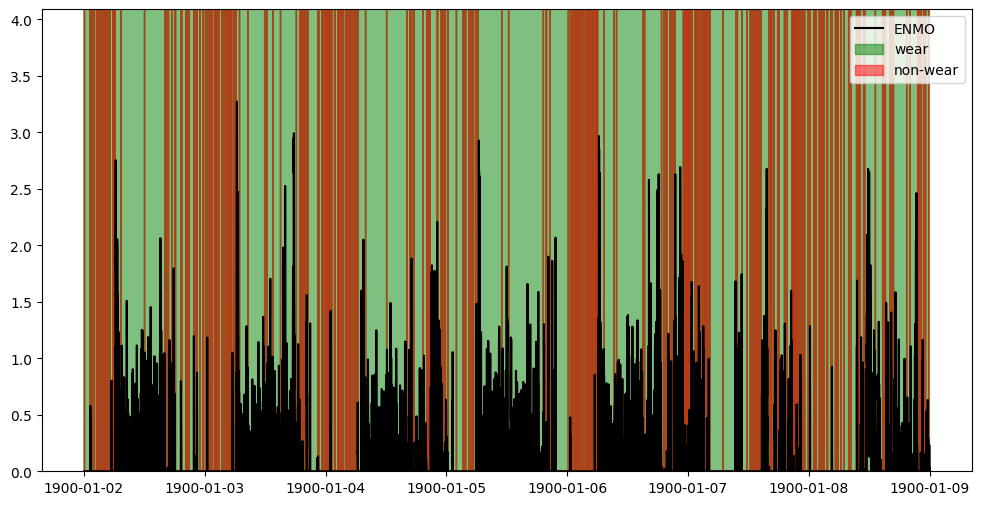

In [5]:
plot_enmo(nhanes_handler)

In [6]:
features_args = {
    'sleep_ck_sf': 0.0025,
    'sleep_rescore': True,
    'pa_cutpoint_sl': 200,
    'pa_cutpoint_lm': 800,
    'pa_cutpoint_mv': 1300,
}

In [7]:
features = WearableFeatures(nhanes_handler, features_args)

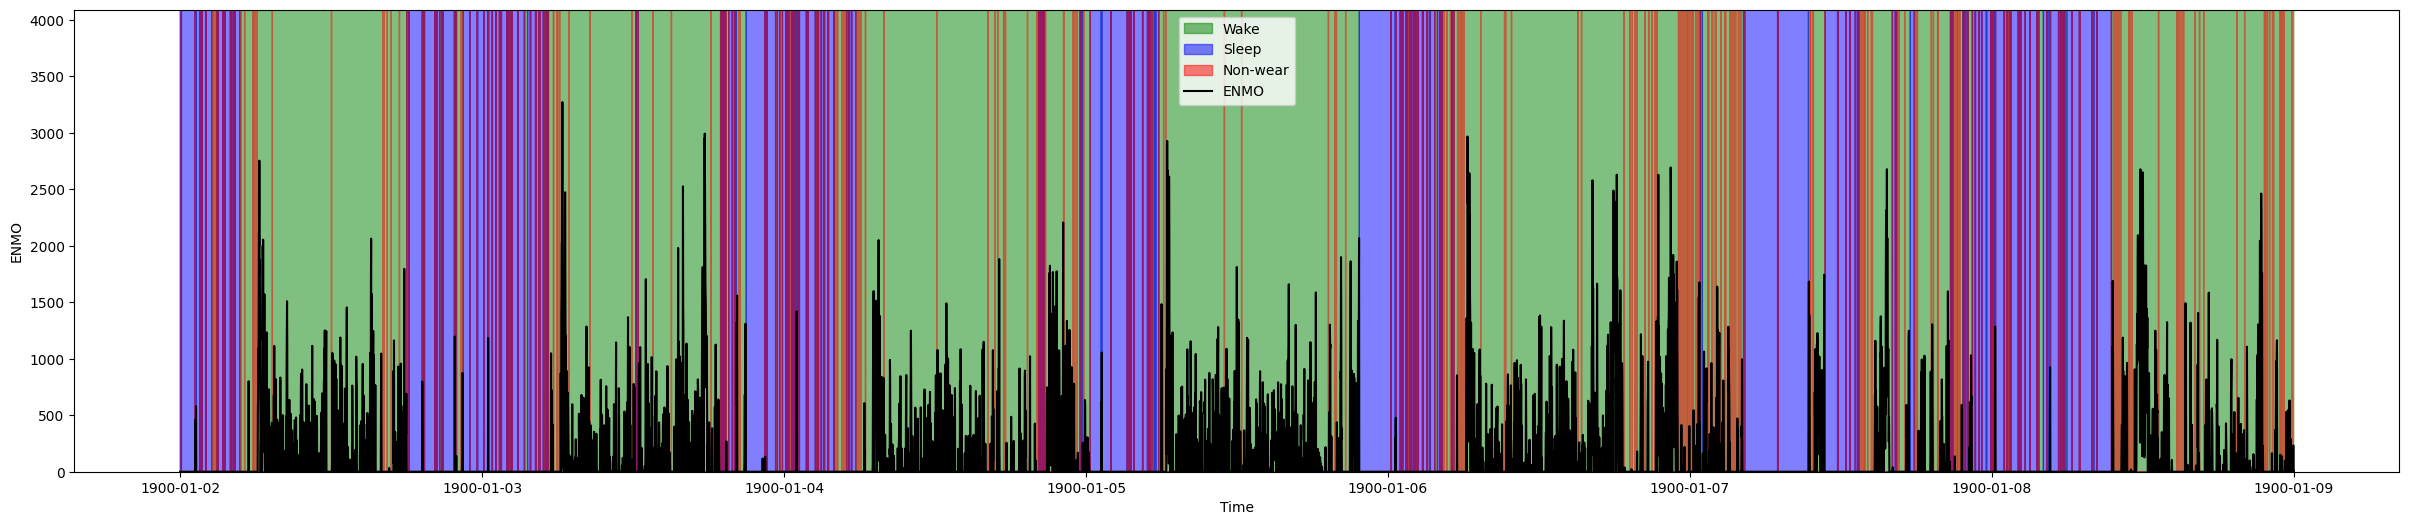

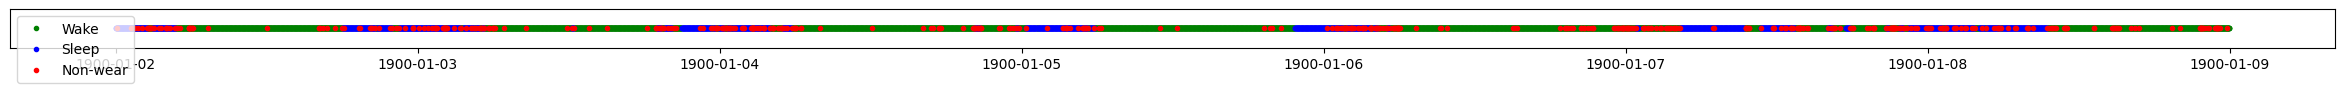

In [8]:
plot_sleep_predictions(features, simple=False)
plot_sleep_predictions(features, simple=True)

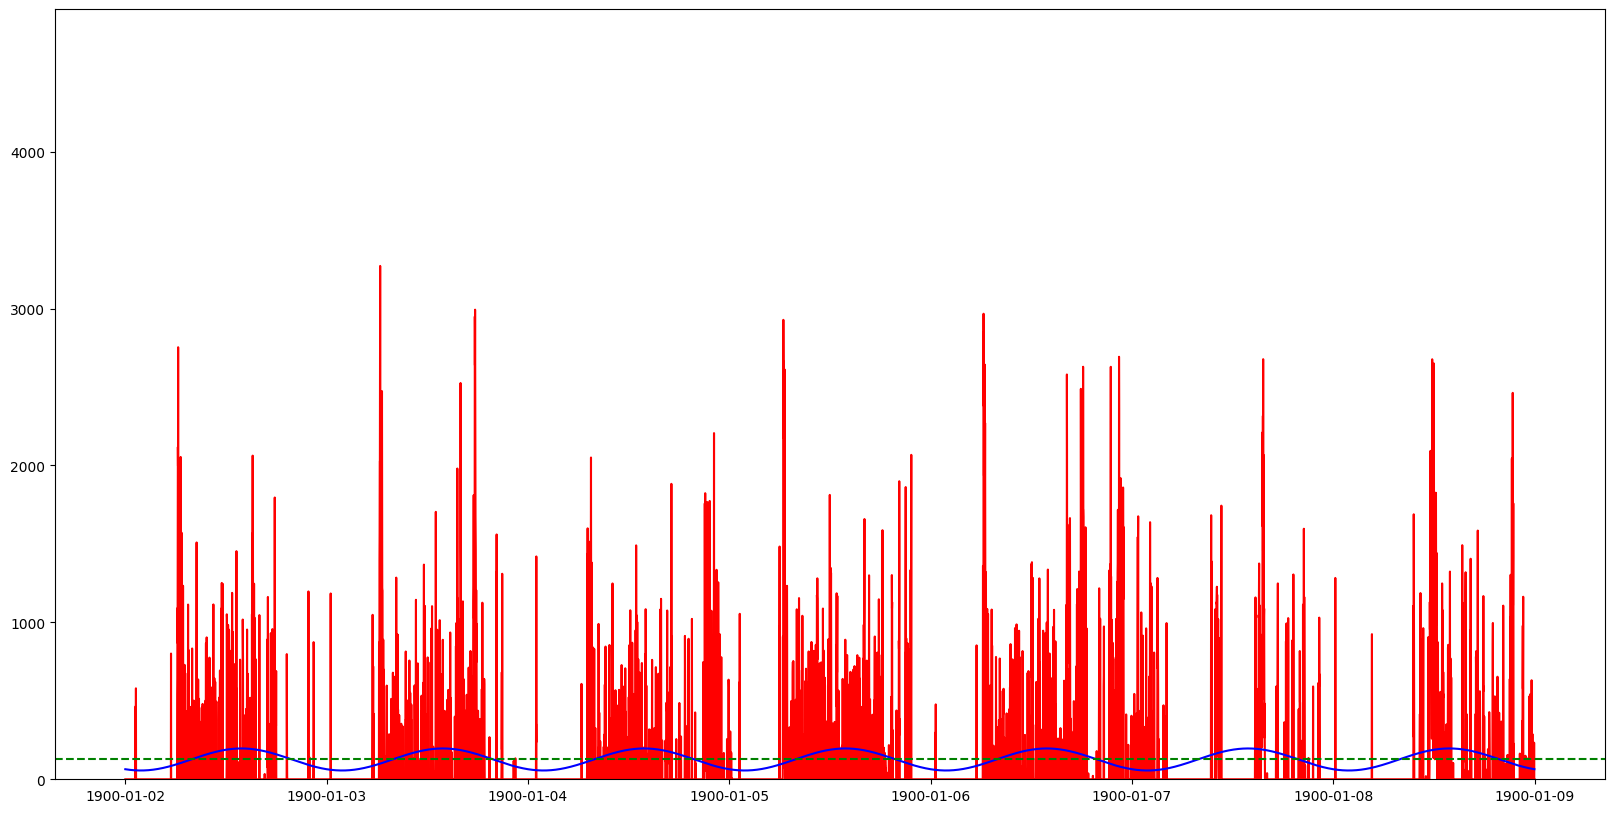

In [9]:
plot_cosinor(features)

In [10]:
features.get_features()['cosinor']

{'MESOR': 126.22416315897064,
 'amplitude': 70.19641553293488,
 'acrophase': 3.6312245912570886,
 'acrophase_time': 832.2153741725946}

In [11]:
features.get_features()['nonparam']

{'IS': 0.30965270763336605,
 'IV': 1.6257323912972617,
 'M10': [219.03474891341693,
  216.07662952064607,
  154.16706137628532,
  217.5324436551325,
  277.2235969133353,
  150.56194861394147,
  247.13328022877056],
 'M10_start': [Timestamp('1900-01-02 06:01:00'),
  Timestamp('1900-01-03 07:54:00'),
  Timestamp('1900-01-04 07:04:00'),
  Timestamp('1900-01-05 06:21:00'),
  Timestamp('1900-01-06 13:01:00'),
  Timestamp('1900-01-07 09:18:00'),
  Timestamp('1900-01-08 11:30:00')],
 'L5': [3.5112492007220695,
  3.4942690258423514,
  0.0,
  5.575939289511793,
  2.5833471757831425,
  0.0,
  4.335221279247324],
 'L5_start': [Timestamp('1900-01-02 00:00:00'),
  Timestamp('1900-01-03 00:31:00'),
  Timestamp('1900-01-04 01:01:00'),
  Timestamp('1900-01-05 00:19:00'),
  Timestamp('1900-01-06 00:00:00'),
  Timestamp('1900-01-07 04:10:00'),
  Timestamp('1900-01-08 00:17:00')],
 'RA': [0.9684447329498037,
  0.9681718383540473,
  1.0,
  0.9500158692746634,
  0.9815347886794378,
  1.0,
  0.9655207610237

In [12]:
features.get_features()['physical_activity']

{'sedentary': [1238, 1218, 1212, 1162, 1133, 1258, 1242],
 'light': [132, 146, 159, 209, 190, 103, 105],
 'moderate': [52, 43, 51, 48, 66, 62, 54],
 'vigorous': [18, 33, 18, 21, 51, 17, 39]}

In [13]:
features.get_features()['sleep']

{'TST': [535000, 466000, 258000, 430000, 205000, 613000, 473000],
 'WASO': [-532561, -463561, -255578, -427582, -203686, -610611, -471431],
 'PTA': [37152.778,
  32361.111,
  17916.667,
  29861.111,
  14236.111,
  42569.444,
  32847.222],
 'NWB': [0, 0, 0, 0, 0, 0, 0],
 'SOL': [0, 0, 0, 21, 0, 50, 0],
 'SRI': 20.123101360071487}